In [1]:
import numpy as np # import numpy
from sklearn.datasets import make_classification # library untuk membuat data sintesis klasifikasi biner

# membuat data set sintetis dengan 30 sample dan 2 fitur
X,y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

# merubah dataset X menjadi nilai absolut
X = np.absolute(X)

# membulatkan dua angka dibelakang koma
X = np.round(X, 2) * 100

# merubah tipe data ke integer
X = X.astype(int)
print(X)
print(y)

[[ 51  88]
 [ 85 100]
 [179  55]
 [189 100]
 [ 52 110]
 [  2 163]
 [ 79 125]
 [149  63]
 [ 96  80]
 [ 59  62]
 [ 26  61]
 [112 134]
 [100  33]
 [429 123]
 [ 80 184]
 [119  19]
 [104  65]
 [151  88]
 [ 59 151]
 [233 114]
 [  6 180]
 [ 22 117]
 [126  94]
 [112 106]
 [137  28]
 [ 22 192]
 [ 15 135]
 [158  65]
 [ 88 145]
 [ 76  70]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0]


In [2]:
import pandas as pd # import pandas

# melakukan reshape pada y menjadi data 2d
y_new = y.reshape(len(y), 1)

# menggabungkan data x dan label y dalam 1 array
data = np.concatenate((X, y_new), axis=1)

# membuat nama kolom data x
nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']

# membuat dataframe dari array dan nama kolom tadi
df = pd.DataFrame(data, columns=nama_kolom)

# cetak 5 data teratas
df.head()

,Fitur 1,Fitur 2,Label
0,51,88,0
1,85,100,0
2,179,55,0
3,189,100,0
4,52,110,0


In [3]:
# membuat nama label
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

# menduplikasikan dataframe
df_label = df.copy()

# merubah label pada dataframe yang baru
df_label['Label'] = df_label['Label'].map(labels)

# cetak 5 data teratas
df_label.head()

,Fitur 1,Fitur 2,Label
0,51,88,Kelas B
1,85,100,Kelas B
2,179,55,Kelas B
3,189,100,Kelas B
4,52,110,Kelas B


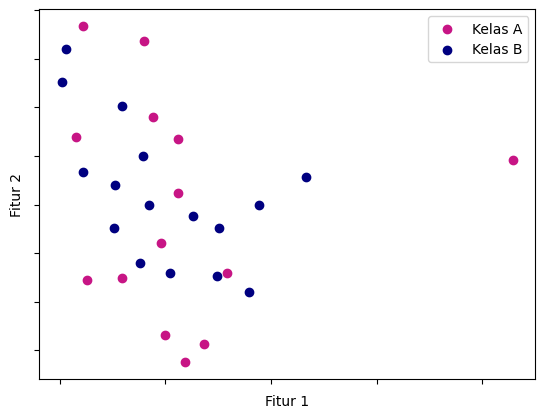

In [4]:
import matplotlib.pyplot as plt #import matplotlib

# mendefinisikan warna tiap class
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# mengelompokkan data berdasarkan label yang diberi
gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

# menampilkan data dengan plotlib
plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

In [5]:
from sklearn.naive_bayes import MultinomialNB # package untuk melakukan klasifikasi naive bayes pada multinomial
from sklearn.model_selection import train_test_split # untuk membagi data menjadi data train dan data tes
from sklearn.metrics import accuracy_score # untuk mengevaluasi skor akurasi

mnb = MultinomialNB() # instansiasi model

# membagi data train dan data tes
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

# train model
mnb.fit(X_train, y_train)

# melakukan prediksi dengan data train
y_train_pred = mnb.predict(X_train)

# evaluasi skor akurasi model
acc_train = accuracy_score(y_train, y_train_pred)

# melakukan prediksi dengan data tes
y_test_pred = mnb.predict(X_test)

# evaluasi skor akurasi model
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.47619047619047616
Hasil akurasi data test: 0.4444444444444444


In [6]:
# package untuk melakukan klasifikasi naive bayes dan mengasumsikan kemungkinan fitur terdistribusi secara gaussian atau secara normal
from sklearn.naive_bayes import GaussianNB 

gnb = GaussianNB() # instansiasi objek

# melatih model
gnb.fit(X_train, y_train)

# melakukan prediksi dengan data train
y_train_pred_gnb = gnb.predict(X_train)

# evaluasi skor akurasi model
acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)

# melakukan prediksi dengan data tes
y_test_pred_gnb = gnb.predict(X_test)

# evaluasi skor akurasi model
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

# Print hasil evaluasi
print(f'Hasil akurasi data train (Gaussian): {acc_train_gnb}')
print(f'Hasil akurasi data test (Gaussian): {acc_test_gnb}')

Hasil akurasi data train (Gaussian): 0.6666666666666666
Hasil akurasi data test (Gaussian): 0.2222222222222222
